Este colab fue desarrollado por Arnold Charry Armero.

# Naïve Bayes

 Naïve Bayes es un algoritmo de clasificación inspirado en el Teorema de Bayes, pero que se diferencia de este en que no toma a las características $x_{i}$ como dependientes entre sí, sino que más bien las asume como independientes con la finalidad de disminuir la complejidad computacional de los cálculos. Por está razón, se le conoce como Naïve, que en español se traduce como ingenuo. No obstante, los resultados de este algoritmo en bases de datos son muy buenos. Se emplea el Procesamiento de Lenguaje Natural (NLP) junto a este algoritmo para clasificar si un correo es spam o no es spam. O también para el ámbito de la medicina, si se tiene una enfermedad dadas varias características o no. Es un algoritmo muy completo, prometedor y fundamental en el campo del Machine Learning. Maneja principalmente variables categóricas, pero también variables númericas. Las númericas las maneja con una distribución de probabilidad, ya sea la normal, la bernoulli, la poisson, etc. El cálculo de la probabilidad condicional se define con la siguiente expresión matemática:


$$ P\left(y_j \mid x_{1}, \dots, x_{n}\right) \;=\; \frac{P(y_j)\,\prod_{i=1}^{n} P\!\left(x_i \mid y_j\right)}{P(x_{1}, \dots, x_{n})}$$


Cuando se le pide que clasifique una observación nueva, calcula la probabilidad condicional de que esa observación pertenezca a cada clase. Luego, las compara y la clase que haya obteniedo la probabilidad condicional más alta, es la seleccionada para clasificar aquella observación.

Como en este colab se utiliza Gaussian Naïve Bayes para estimar la probabilidad condicional, se utiliza la Distribución Normal como sigue,


$$ P\!\left(x_i \mid y_j\right) \;=\; \frac{1}{\sigma_{y_j,i}\,\sqrt{2\pi}} e^{-\tfrac{1}{2} \left(\tfrac{x_i - \mu_{y_j,i}}{\sigma_{y_j,i}}\right)^2} $$

**Nota:** Si se utiliza Gaussian Naïve Bayes, todas las características deben de ser númericas.

Ahora se continúa con la implementación del código,

In [ ]:
# Se importan las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/Cancer_Data.csv', sep = ',')

In [ ]:
# Nos aseguramos de ver todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Primero se analiza la base de datos,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Se elimina la columna de id,

In [ ]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

Ahora se observan las métricas,

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Se contabiliza el tipo de cancer que se tiene,

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


## Preprocesamiento de Datos

Se verifica a ver el tema de los faltantes,

In [ ]:
df.isnull().sum()[df.isnull().sum() != 0]

,0


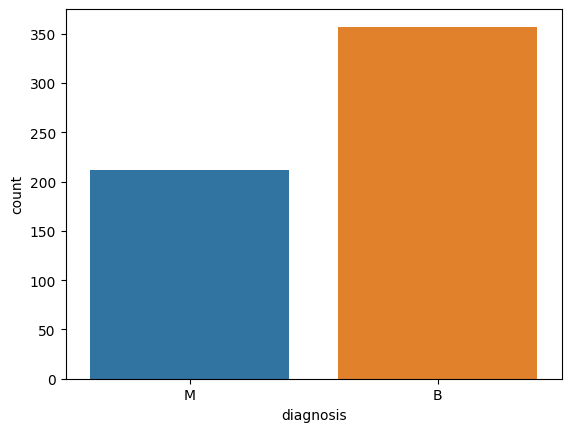

In [ ]:
# Gráfico de barras por tipo de cáncer
sns.countplot(data=df,x='diagnosis', hue='diagnosis')
plt.show()

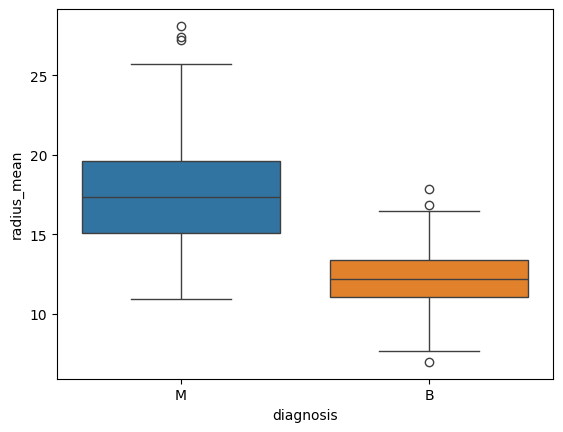

In [ ]:
# Gráfico de caja
sns.boxplot(x='diagnosis',y='radius_mean',data=df, hue='diagnosis')
plt.show()

In [ ]:
# Obtenemos las características
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
# Se detectan las columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns.drop(df.columns[0])
cat_indices = [df.columns.get_loc(col) for col in cat_cols]

# Se detectan las columnas numéricas
num_indices = [i for i in range(df.shape[1] - 1) if i not in cat_indices]

# Se crea el transformador
ct = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_indices),
                  ('encoder', OneHotEncoder(drop='first',sparse_output=False, dtype=int), cat_indices)],
                    remainder='passthrough')

## Separación en Base de datos de Entrenamiento y Prueba

In [ ]:
# Se divide la base de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Escalado de Datos

In [ ]:
# Se escalan las variables
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
# Visualizar el array X_train
print(X_train)

[[-0.12348985 -0.29680142 -0.17050713 ... -0.84082156 -0.8563616
  -0.76574773]
 [-0.22826757 -0.65795149 -0.25377521 ... -0.37706655 -1.3415819
  -0.41480748]
 [ 0.14553402 -1.23056444  0.24583328 ... -0.04762652 -0.08997059
   0.4882635 ]
 ...
 [ 0.03226081 -0.55578404 -0.08064356 ... -1.26179013 -0.6828391
  -1.27672587]
 [-0.05552593  0.10949242 -0.04684166 ...  1.07924018  0.4755842
   1.25530227]
 [-0.56525537  0.32333128 -0.619825   ... -0.61952313 -0.30366032
  -0.84348042]]


## Entrenamiento del Modelo

Ahora vamos con el modelo Naïve Bayes con sus predicciones,

In [ ]:
GNB_model = GaussianNB()

In [ ]:
GNB_model.fit(X_train, y_train)

GaussianNB()

Realizando una predicción,

In [ ]:
# Se debe de hacer en el orden original
print("Predicción:", GNB_model.predict(ct.transform([[20.57, 17.77, 132.90, 1326.0, 0.08474,	0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339,
                                                      3.398, 74.08, 0.005225, 0.01308, 0.01860, 0.01340, 0.01389, 0.003532, 24.99, 23.41, 152.50, 1709.0,
                                                      0.1444, 0.4245, 0.4504, 0.2430, 0.3613, 0.08758]]))[0])

Predicción: M


In [ ]:
# Obtenemos las predicciones
y_pred = GNB_model.predict(X_test)
print(y_pred.reshape(len(y_pred),1))

[['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['M']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['M']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']

## Rendimiento del Modelo

In [ ]:
# Obteniendo la precisión del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.935672514619883


In [ ]:
# Matriz de confusión
confusion_matrix(y_test,y_pred)

array([[103,   5],
       [  6,  57]])

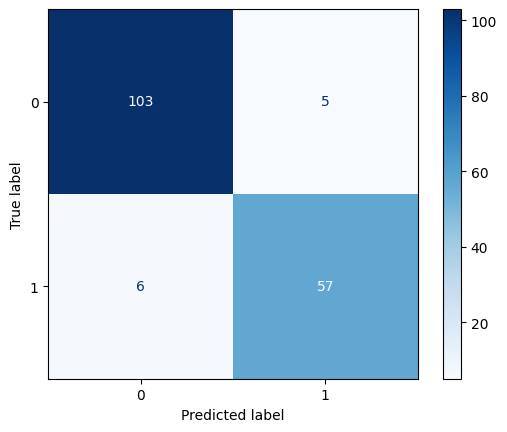

In [ ]:
# Visualizando la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

In [ ]:
# Obteniendo el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.94      0.95      0.95       108
           M       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



## Validación Cruzada

Se mide el accuracy para la diferente selección de datos de entrenamiento y prueba,

In [ ]:
# Aplicar K-fold Cross Validation
accuracies = cross_val_score(estimator = GNB_model, X = X_train, y = y_train, cv = 10, scoring = 'accuracy')
print(accuracies.mean())

0.9320512820512821


## Referencias

*   Cancer data. (2023, March 22). Kaggle. https://www.kaggle.com/datasets/erdemtaha/cancer-data
*   Jacinto, V. R. (2024). Machine learning: Fundamentos, algoritmos y aplicaciones para los negocios, industria y finanzas. Ediciones Díaz de Santos.
*   Lantz, B. (2019). Machine Learning with R: Expert techniques for predictive modeling. Packt Publishing Ltd.
